  0%|          | 0/1000 [00:00<?, ?it/s]

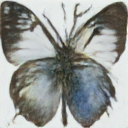

  0%|          | 0/1000 [00:00<?, ?it/s]

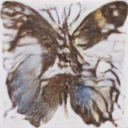

  0%|          | 0/1000 [00:00<?, ?it/s]

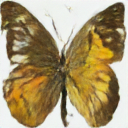

  0%|          | 0/1000 [00:00<?, ?it/s]

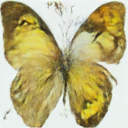

  0%|          | 0/1000 [00:00<?, ?it/s]

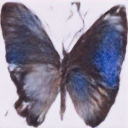

In [18]:
from diffusers import DDPMPipeline, UNet2DModel, DDPMScheduler
from PIL import Image
import torch

model_dir = "Modelle/Mit_500_Bildern_trainiert/butterfly_no_poison"
output_dir = "f{model_dir}/samples"

unet_model = UNet2DModel.from_pretrained(f"{model_dir}/unet")
scheduler = DDPMScheduler.from_pretrained(f"{model_dir}/scheduler")

pipeline = DDPMPipeline(unet=unet_model, scheduler=scheduler)

device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)

num_images = 5

for i in range(num_images):
    generated_image = pipeline()["images"][0]

    display(generated_image)
    generated_image.save(f"{output_dir}/generated_image_{i+1}.png")
